#Loksabha Election 2019 Data Analysis in India

Importing the Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Files

In [2]:
import io
df2 = pd.read_csv('C:\\Users\\shard\\Downloads\\LS_2.0.csv')

#Displaying the Data

In [3]:
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [4]:
df2.rename(columns={'CRIMINAL\nCASES': 'criminal'}, inplace=True)

#Shape of the Dataset

In [5]:
df2.shape

(2263, 19)

Information about all the collumns in the Dataset

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   criminal                                  2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

#Description of Dataset

In [7]:
df2.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


#Checking the Null Value in the Dataset

In [8]:
df2.isnull().values.any()

True

Crime count Here we are counting the total crimes done by an MP in an individual states in India

In [9]:
df2['criminal'].value_counts()

criminal
0                1242
1                 313
2                 119
3                 104
4                  64
5                  42
6                  26
Not Available      22
7                  18
8                  16
10                 11
9                  11
11                  5
14                  4
12                  4
13                  3
15                  2
16                  1
52                  1
240                 1
31                  1
41                  1
42                  1
28                  1
22                  1
204                 1
24                  1
40                  1
18                  1
Name: count, dtype: int64

In [12]:
df2['criminal'] = df2['criminal'].replace(['Not Available'],'0')
df2['criminal'] = pd.to_numeric(df2['criminal'] , errors='coerce')
df2['criminal'].value_counts()
df2['criminal'].isna()

0       False
1       False
2       False
3        True
4       False
        ...  
2258    False
2259    False
2260    False
2261    False
2262     True
Name: criminal, Length: 2263, dtype: bool

#Here we are removing the null values from the collumn criminal in the dataset.

In [13]:
df2['criminal'].isnull().sum().sum()

245

#Here we are displaying the data again.

In [14]:
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


#Barplot of crime Count in different states

Here we have created a barplot of crime count in different states in India.

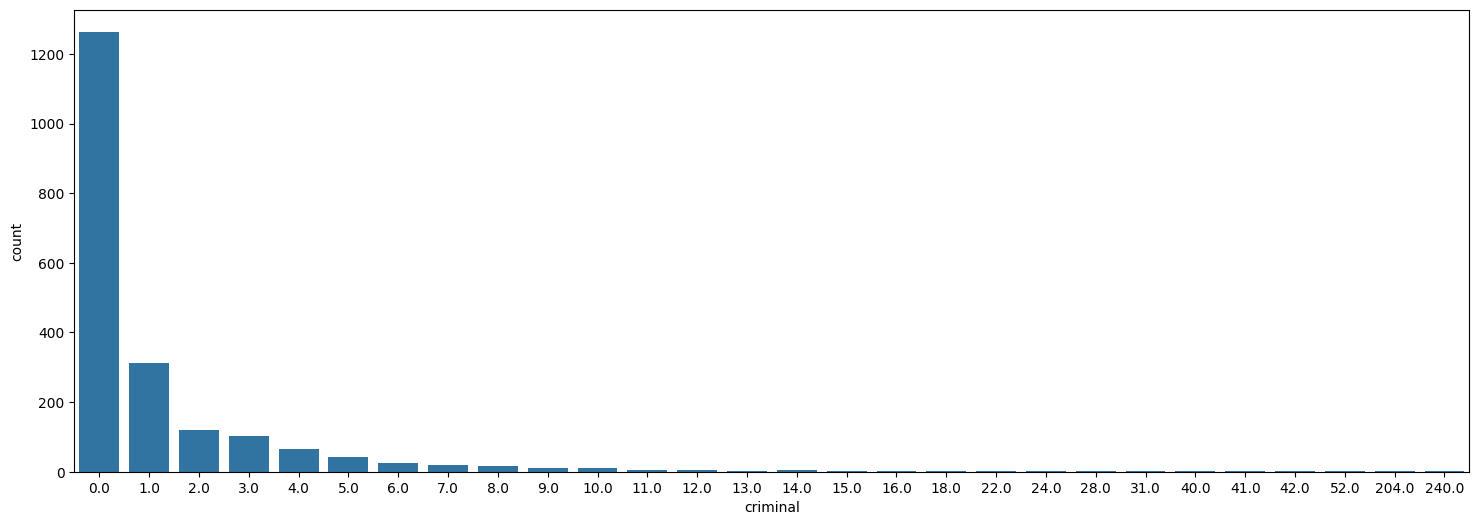

In [15]:
#Using Seaborn's CountPlot with figure size 10 * 6
plt.figure(figsize=(18,6))
sns.countplot(x='criminal',data=df2);

#From the description given below, we can see that the mean of the crime among contestants is 1.45 where as the minimum crime,25% and 50% contestants did not make 
any crime but sadly in 75 % of total candidates the crime rate became 1.0. More surprisingly the maximum crime conceived by a person is 240,that's huge.

In [16]:
df2['criminal'].describe()

count    2018.000000
mean        1.453915
std         7.636973
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       240.000000
Name: criminal, dtype: float64

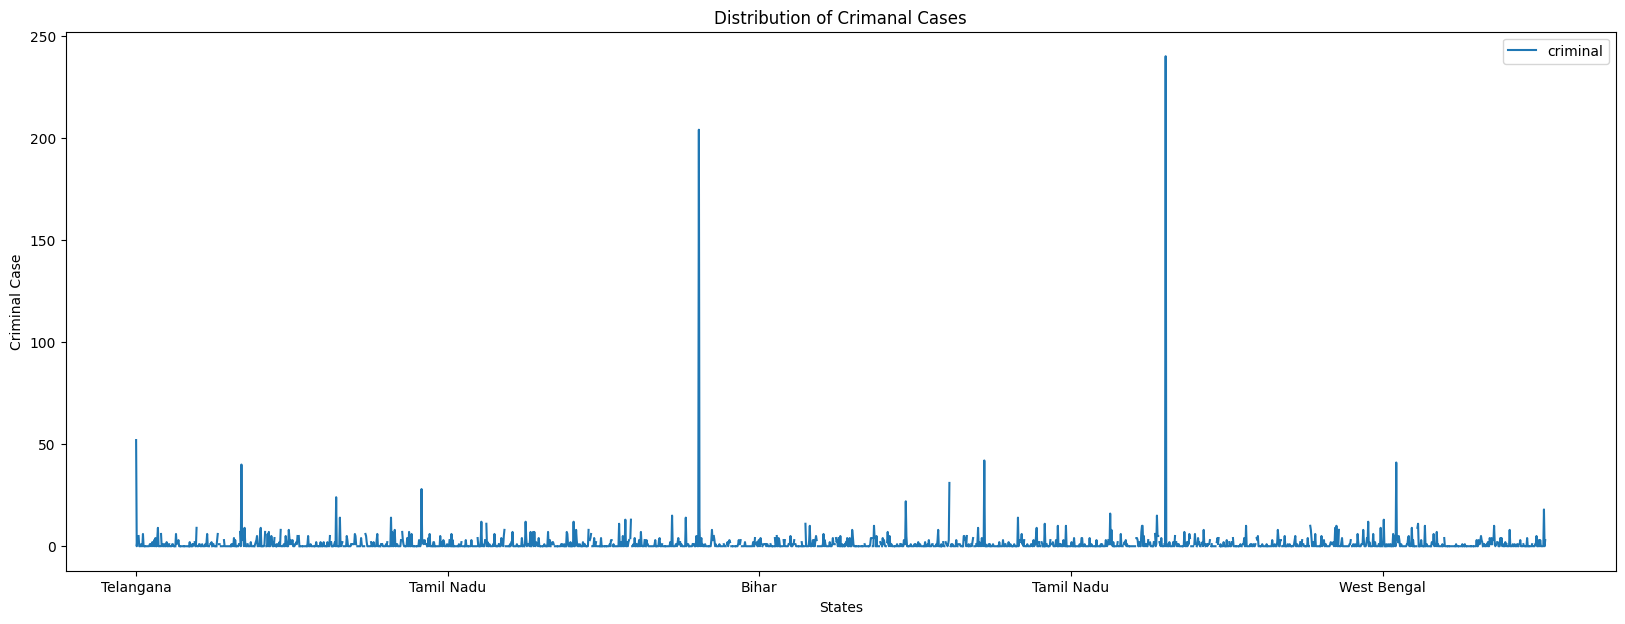

In [17]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(100, 7))
df2.plot(x="STATE", y=["criminal"],figsize =(20, 7), fontsize=10)
plt.xlabel("States")
plt.ylabel("Criminal Case")
plt.title("Distribution of Crimanal Cases")
plt.show()
     

From the graph and the below description we can see that the maximum no of crime done by a single person is 240.

Education vs Criminal Barplot

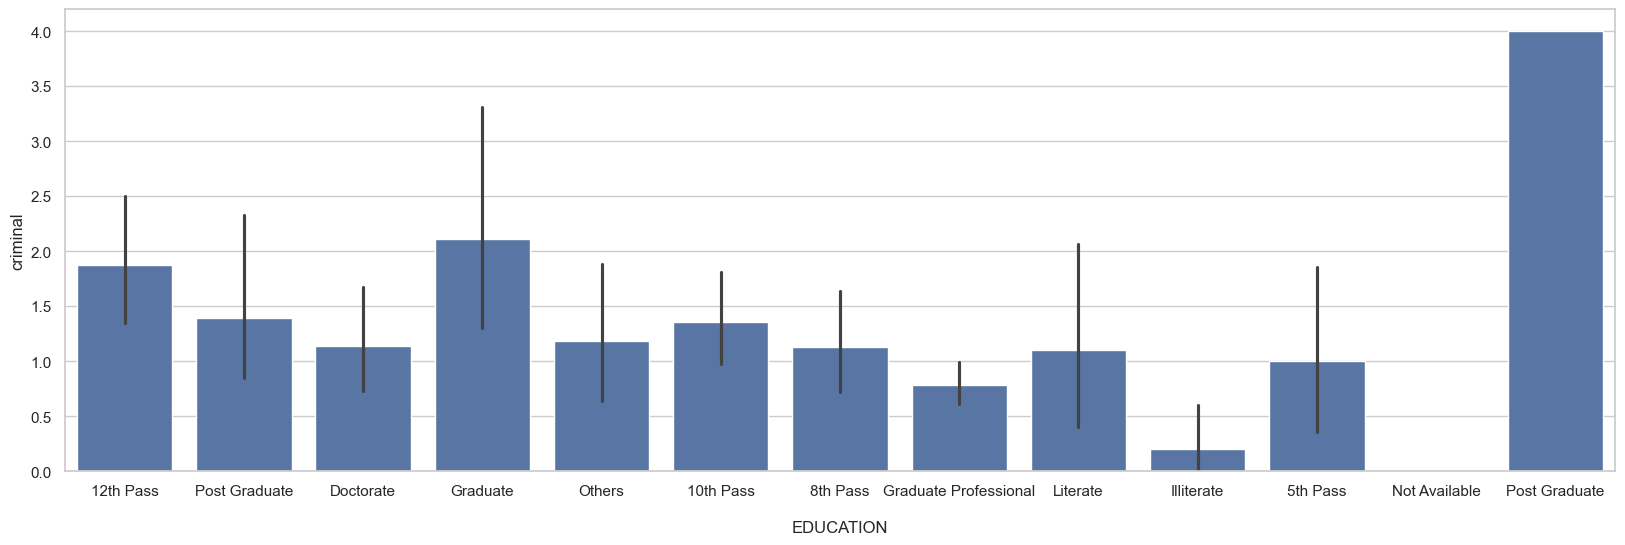

In [18]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,6))
ax = sns.barplot(x="EDUCATION", y="criminal", data=df2)

We can analyze from the graph that Graduate and 12 th Pass criminal candidates are maximum. Specially we want to mention tha that a single graduate person has done 240 crimes.

In [19]:
cn1= int (0)
cn2= int (0)
for i in df2['GENDER']:
  if i=='MALE':
    cn1+=1
  elif i=='FEMALE':
    cn2+=1
print(cn1)
print(cn2)

1760
258


#pie chart of Male vs Female candidates

From the pie chart we can see that the the number of male candidates is greater than the number of female candidates.

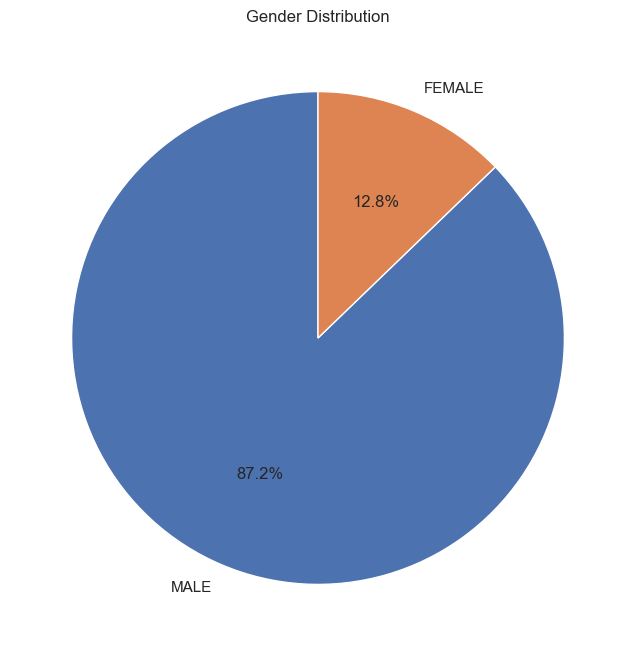

Count of MALE: 1760
Count of FEMALE: 258
Percentage of MALE: 87.21506442021804
Percentage of FEMALE: 12.784935579781962


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame with the 'GENDER' column
cn1 = 0
cn2 = 0
for i in df2['GENDER']:
    if i == 'MALE':
        cn1 += 1
    elif i == 'FEMALE':
        cn2 += 1

# Calculate percentages
total = cn1 + cn2
percent_male = (cn1 / total) * 100
percent_female = (cn2 / total) * 100

# Create labels and counts array for pie chart
mylabels = ['MALE', 'FEMALE']
counts = np.array([cn1, cn2])

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(counts, labels=mylabels, autopct='%1.1f%%', startangle=90)  # Display percentages
plt.title('Gender Distribution')  # Add title if needed
plt.show()

# Outputting counts and percentages
print("Count of MALE:", cn1)
print("Count of FEMALE:", cn2)
print("Percentage of MALE:", percent_male)
print("Percentage of FEMALE:", percent_female)


#State wise Candidates with Crime Cases

The number of candidates with crime cases are maximum in Bihar,Kerala,Maharashtra,West Bengal,Uttar Pradesh states.

In [24]:
state_criminal = df2.groupby('STATE')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['STATE'])

state_criminal_winner = df2[df2['WINNER']>0].groupby('STATE')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['STATE'])
state_criminal

,criminal
STATE,
Andhra Pradesh,81.0
Bihar,312.0
Gujarat,39.0
Jharkhand,67.0
Karnataka,44.0
Kerala,669.0
Madhya Pradesh,63.0
Maharashtra,302.0
Odisha,105.0


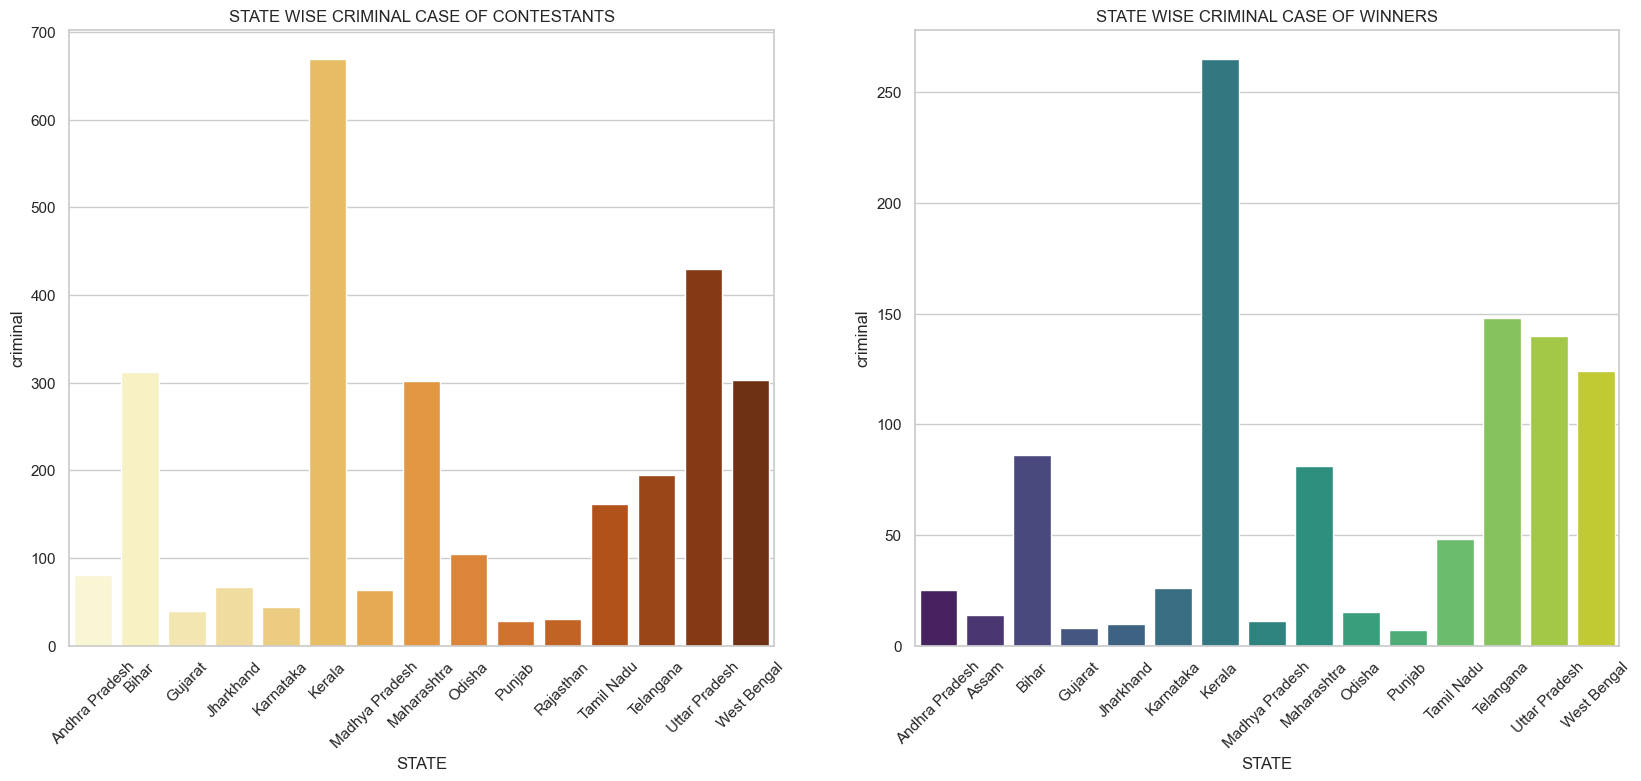

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming state_criminal and state_criminal_winner are the DataFrames you want to plot

# 2 Barplot Side by Side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Passing X axis and Y axis along with subplot position
sns.barplot(x=state_criminal.index, y=state_criminal['criminal'], hue=state_criminal.index, ax=axes[0], palette='YlOrBr', legend=False)
axes[0].tick_params(axis='x', rotation=45)  # changing the X axis position to read more clearly
axes[0].set_title('STATE WISE CRIMINAL CASE OF CONTESTANTS')

# We can also change the color of the barplots by giving different palettes
sns.barplot(x=state_criminal_winner.index, y=state_criminal_winner['criminal'], hue=state_criminal_winner.index, ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('STATE WISE CRIMINAL CASE OF WINNERS')
axes[1].tick_params(axis='x', rotation=45)  # changing the X axis position to read more clearly

plt.show()


Here we can see the crime case across the states of candidates and winners. Here the maximum height of bargraph is showing in the state Kerala.

In [26]:
cn1= int (0)
cn2= int (0)
cn3= int (0)
cn4= int (0)
for i in df2['CATEGORY']:
  if i=='SC':
    cn1+=1
  elif i=='ST':
    cn2+=1
  elif i=='GENERAL':
    cn3+=1
  else:
    cn4+=1
print(cn1)
print(cn2)
print(cn3)
print(cn4)

383
243
1392
245


#Barplot of category Growth:

Here we calulating the number of SC,ST and GENERAL candidates in the loksabha election 2019.

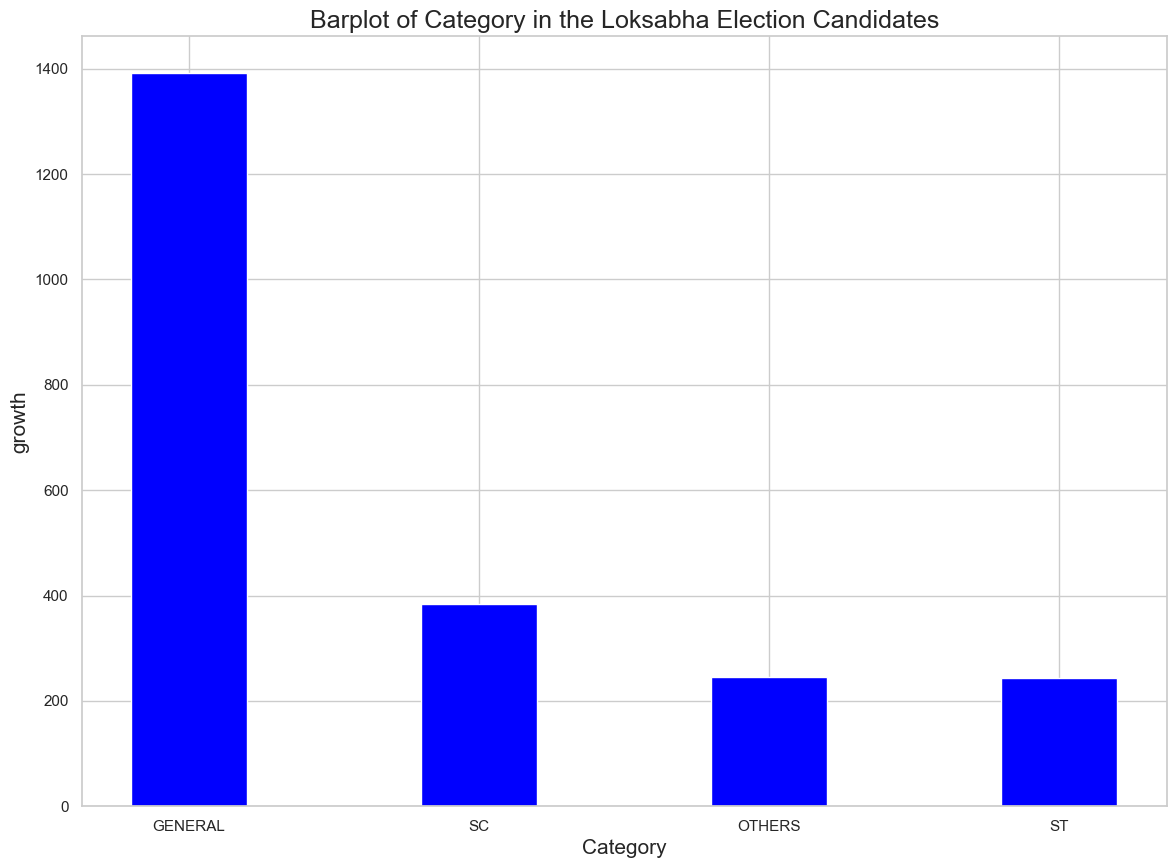

In [27]:
# Initialize data
consumption = ['SC','ST','GENERAL','OTHERS']
growth = [cn1,cn2,cn3,cn4]
  

# Create a pandas dataframe
df = pd.DataFrame({"consumption": consumption,
                   "growth": growth})
df_sorted_desc= df.sort_values('growth',ascending=False)
plt.figure(figsize=(14,10))
# make bar plot with matplotlib
plt.bar('consumption', 'growth',data=df_sorted_desc,color ='blue',
        width = 0.4)
plt.xlabel("Category", size=15)
plt.ylabel("growth", size=15)
plt.title("Barplot of Category in the Loksabha Election Candidates", size=18)
plt.savefig("bar_plot_matplotlib_Python.png")

From the graph we can see that the number of general cadidates are maximum in India.

In [28]:
df2.PARTY.value_counts()

PARTY
BJP       420
INC       413
NOTA      245
IND       201
BSP       163
         ... 
KEC(M)      1
KEC         1
JAPL        1
AKBMP       1
PHJSP       1
Name: count, Length: 133, dtype: int64

#Barplot of Candidate Allocation in Loksabha Election 2019

Here we are counting the total number of allocation of candidates for different parties in different constituncies in India.

In [29]:
cn1= int (0)
cn2= int (0)
cn3= int (0)
cn4= int (0)
cn5= int (0)
cn6= int (0)
for i in df2['PARTY']:
  if i=='BJP':
    cn1+=1
  elif i=='INC':
    cn2+=1
  elif i=='NOTA':
    cn3+=1
  elif i=='IND':
    cn4+=1
  elif i=='BSP':
    cn5+=1
  else:
    cn6+=1
#cn1+=cn6
print(cn1)
print(cn2)
print(cn3)
print(cn4)
print(cn5)
print(cn6)

420
413
245
201
163
821


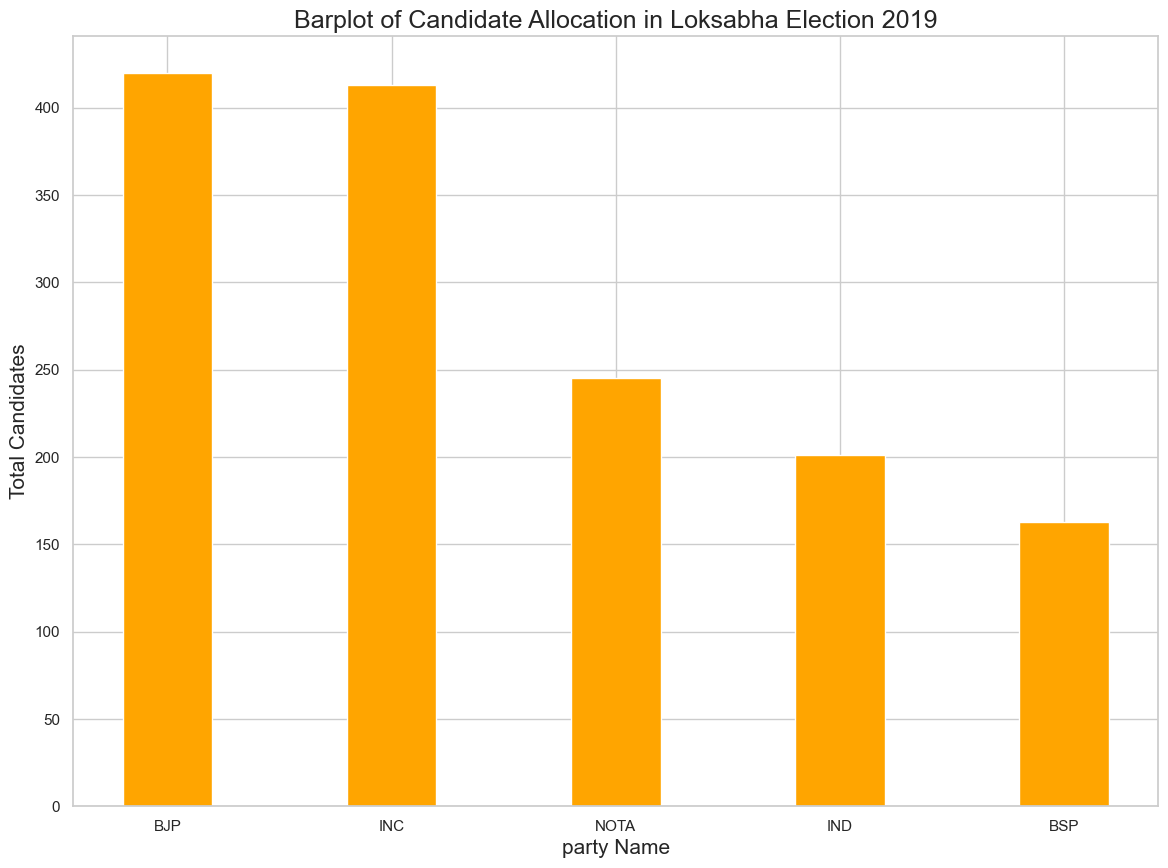

In [31]:
# Initialize data
consumption = ['BJP','INC','NOTA','IND','BSP']
growth = [cn1,cn2,cn3,cn4,cn5]
  

# Create a pandas dataframe
df = pd.DataFrame({"consumption": consumption,
                   "growth": growth})
df_sorted_desc= df.sort_values('growth',ascending=False)
plt.figure(figsize=(14,10))
# make bar plot with matplotlib
plt.bar('consumption', 'growth',data=df_sorted_desc,color ='orange',
        width = 0.4)
plt.xlabel("party Name", size=15)
plt.ylabel("Total Candidates", size=15)
plt.title("Barplot of Candidate Allocation in Loksabha Election 2019", size=18)
plt.savefig("bar_plot_matplotlib_Python.png")

Here we can see that the bjp candidates are maximum.

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   criminal                                  2018 non-null   float64
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [33]:
df2['criminal'] = pd.to_numeric(df2['criminal'] , errors='coerce')

#Bar Plot of Party vs Candidates with Crime Case:

Here we are calculating the criminal case candidates in different parties. From that knowledge we can aware of the criminal cases of the different parties

In [34]:
party_criminal_winner = df2[df2['criminal']>0].groupby('PARTY')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['PARTY'])
party_winner = df2[(df2['criminal']>0) & (df2['WINNER']>0)].groupby('PARTY')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['PARTY'])

party_winner

,criminal
PARTY,
AIMIM,9.0
AITC,17.0
AIUDF,7.0
BJP,403.0
BSP,32.0
DMK,28.0
INC,355.0
IND,6.0
JD(U),31.0


#Bar plot of Party vs History of crime Cases

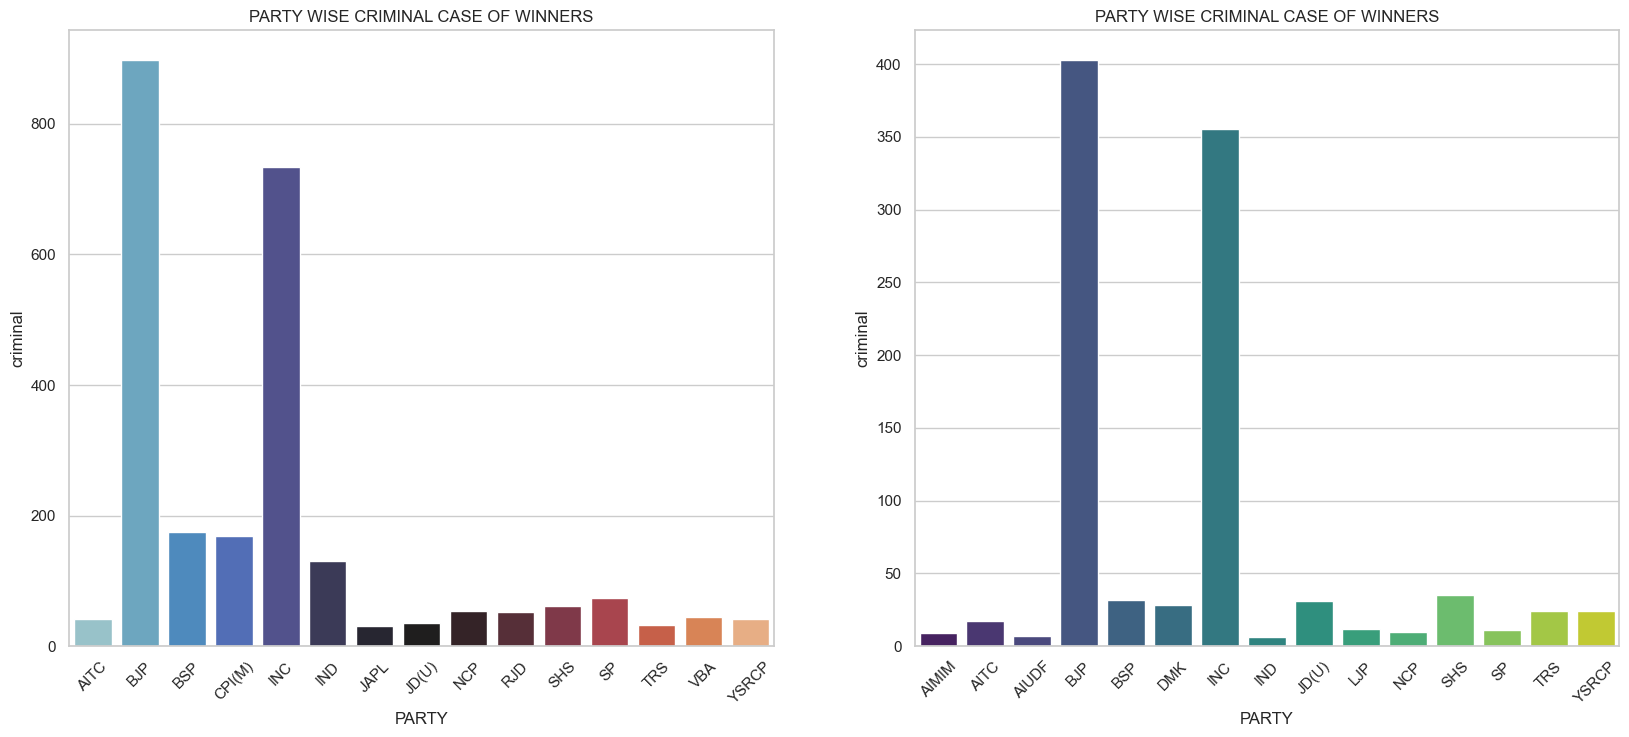

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming party_criminal_winner and party_winner are the DataFrames you want to plot

# 2 Barplot Side by Side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Passing X axis and Y axis along with subplot position
sns.barplot(x=party_criminal_winner.index, y=party_criminal_winner['criminal'], hue=party_criminal_winner.index, ax=axes[0], palette='icefire', legend=False)
axes[0].tick_params(axis='x', rotation=45)  # changing the X axis position to read more clearly
axes[0].set_title('PARTY WISE CRIMINAL CASE OF WINNERS')

# We can also change the color of the barplots by giving different palettes
sns.barplot(x=party_winner.index, y=party_winner['criminal'], hue=party_winner.index, ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('PARTY WISE CRIMINAL CASE OF WINNERS')
axes[1].tick_params(axis='x', rotation=45)  # changing the X axis position to read more clearly

plt.show()

From the above diagram we can see that the bjp and congress parties have maximum number of criminal cases in India. This is because of that, these two parties are all India 
based where as most of the other parties are regional parties.

#The Scatter Plot of States vs Total votes in Loksabha 2019 in India

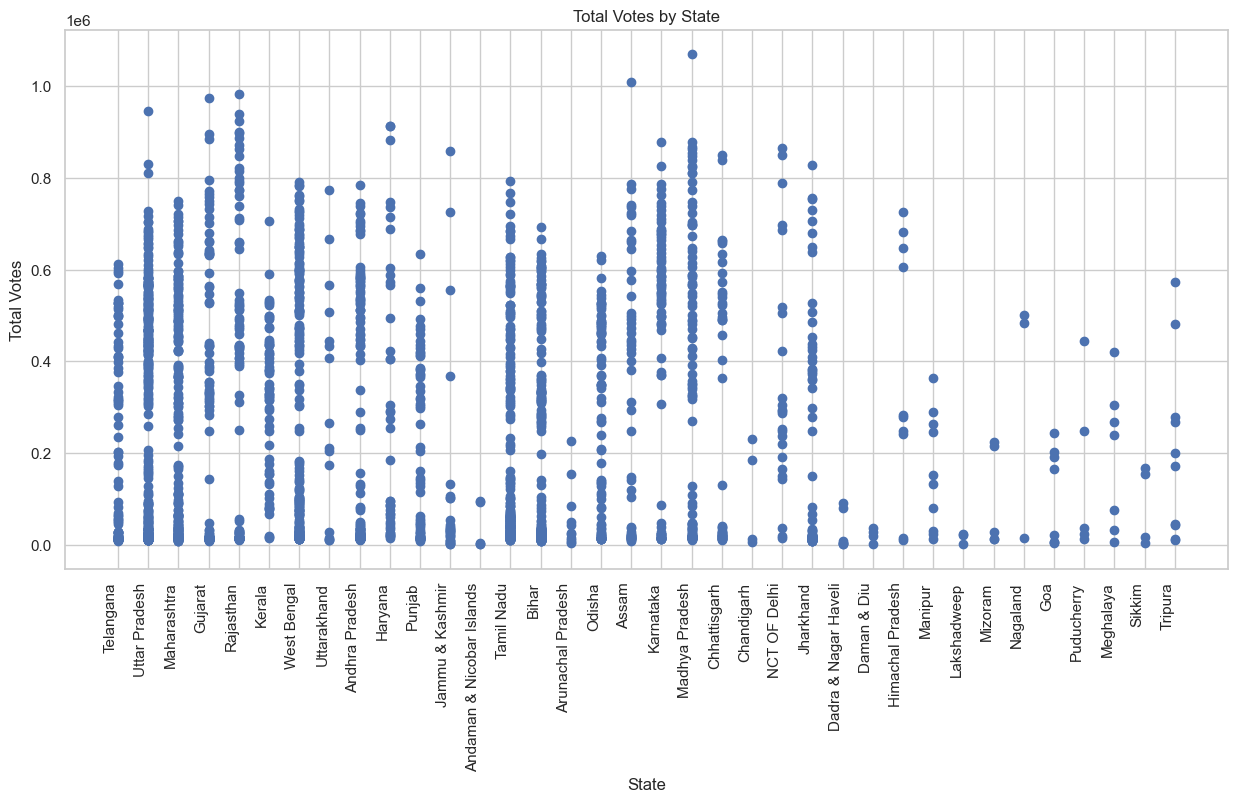

In [36]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed
plt.scatter(df2["STATE"], df2["TOTAL\nVOTES"])

# Set plot title and labels
plt.title('Total Votes by State')
plt.xlabel('State')
plt.ylabel('Total Votes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

plt.show()

In [37]:
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [38]:
age_criminal = df2[df2['criminal']>0].groupby('AGE')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['AGE'])
age_criminal

,criminal
AGE,
37.0,228.0
42.0,68.0
46.0,70.0
48.0,114.0
49.0,335.0
50.0,83.0
51.0,159.0
52.0,143.0
54.0,104.0


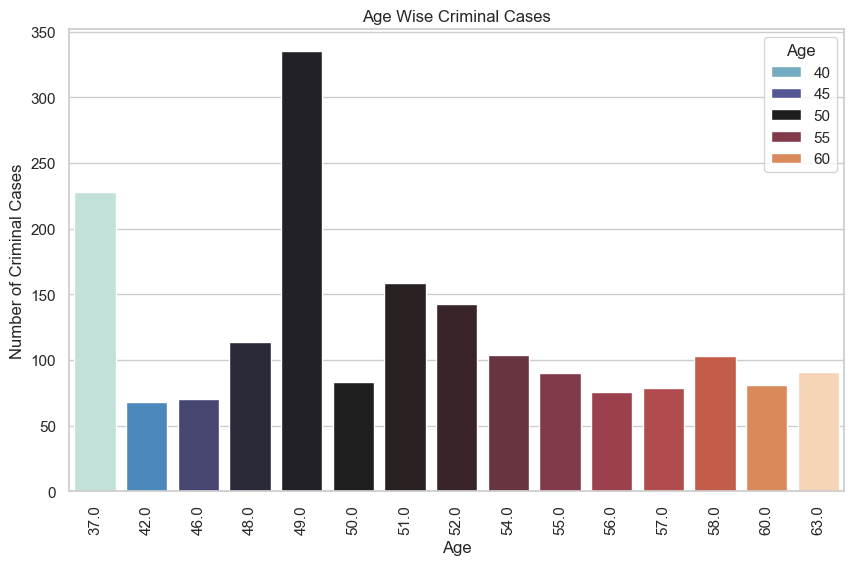

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming age_criminal is the DataFrame you want to plot

# Barplot
plt.figure(figsize=(10,6))
sns.barplot(x=age_criminal.index, y=age_criminal['criminal'], hue=age_criminal.index, palette='icefire', dodge=False)
plt.title('Age Wise Criminal Cases')
plt.xlabel('Age')
plt.ylabel('Number of Criminal Cases')
plt.legend(title='Age')
plt.xticks(rotation=90)
plt.show()

In [40]:
total_voter1 = df2[df2['TOTAL\nVOTES']>0].groupby('STATE')[['TOTAL\nVOTES']].sum().sort_values(by=
                        ['TOTAL\nVOTES']).tail(15).sort_values(by=['STATE'])

total_voter1

,TOTAL\nVOTES
STATE,
Andhra Pradesh,30968703
Assam,17441534
Bihar,38755595
Gujarat,28158684
Jharkhand,14253127
Karnataka,33859226
Kerala,20010727
Madhya Pradesh,35580595
Maharashtra,52287234


#Barplot of State vs Total Votes

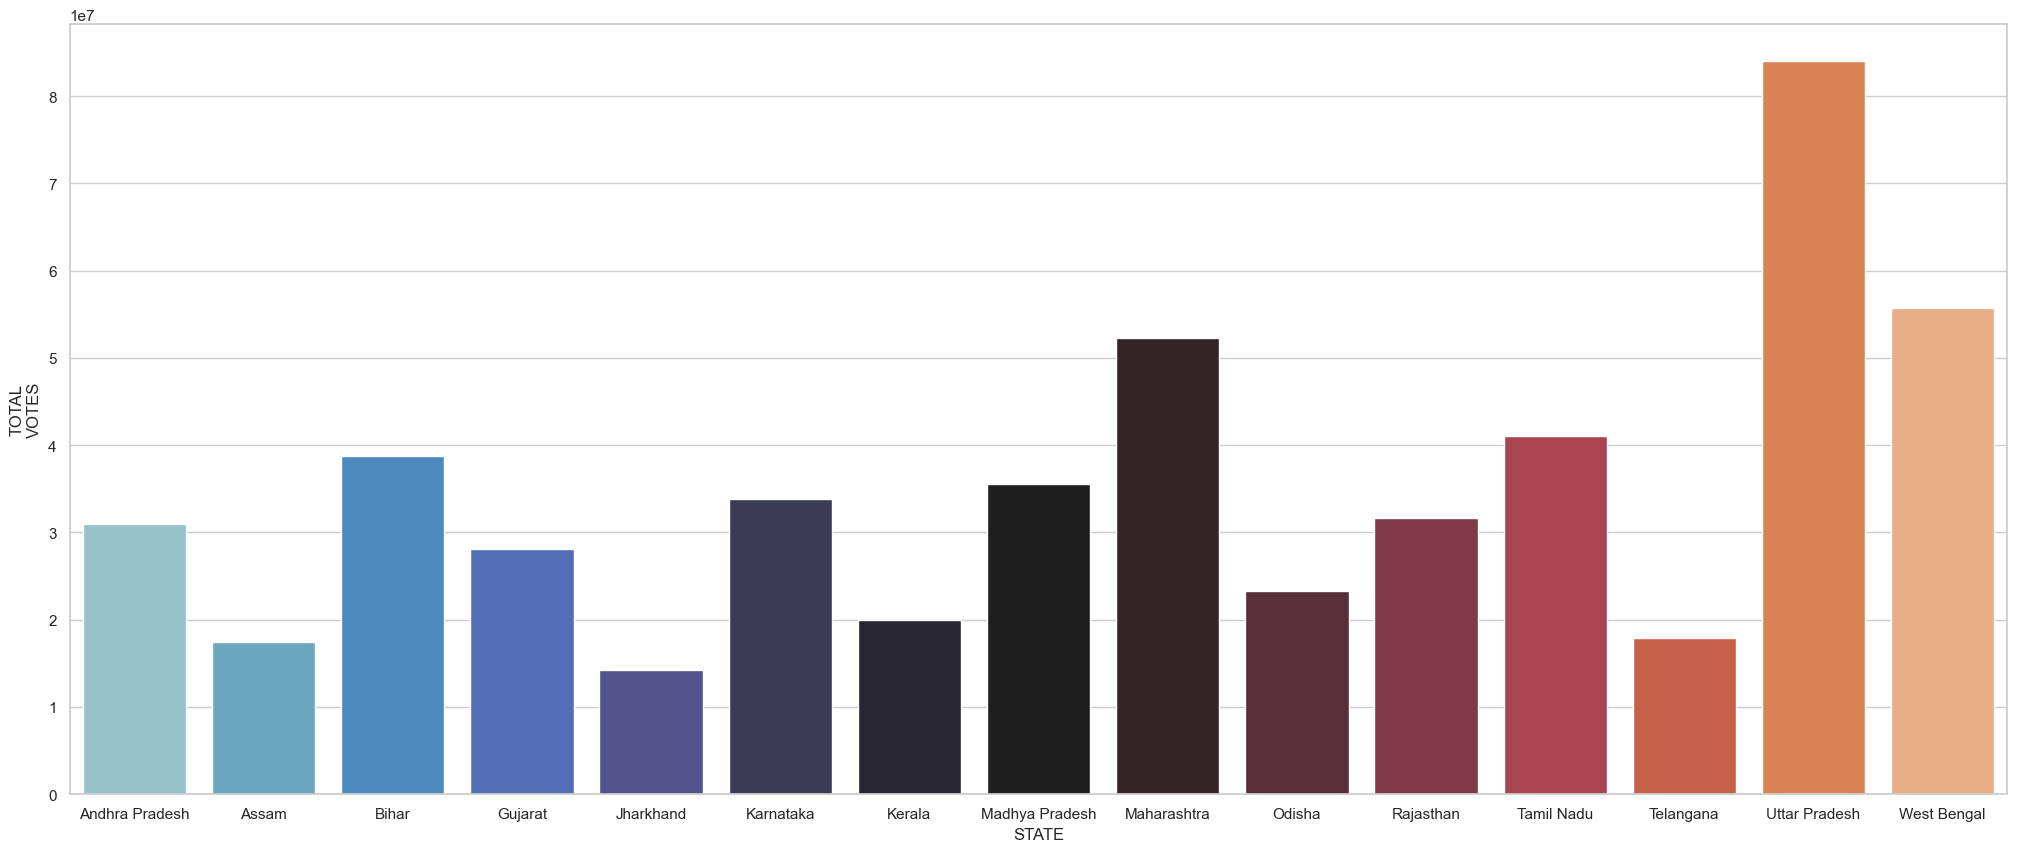

In [41]:

plt.figure(figsize=(25,10))
# Passing X axis and Y axis along with subplot position
sns.barplot(x = total_voter1.index , y = total_voter1['TOTAL\nVOTES'] ,hue=total_voter1.index, palette='icefire');


From the barplot it is transparent that the total number of votes in Maharastra,Uttar pradesh and West Bengal is very much higher than remaining states in India and Uttar pradesh holds the first place in total number of votes.

In [42]:
fm = df2.groupby(['GENDER','WINNER'])[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['GENDER'])

fm

criminal
GENDER WINNER          
FEMALE 1           65.0
       0          171.0
MALE   1          964.0
       0         1734.0

In [43]:
party_winner1 = df2[(df2['criminal']>0) & (df2['WINNER']>0)].groupby('GENDER')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['GENDER'])
party_winner1

,criminal
GENDER,
FEMALE,65.0
MALE,964.0


#Barplot of Gender vs Crime:

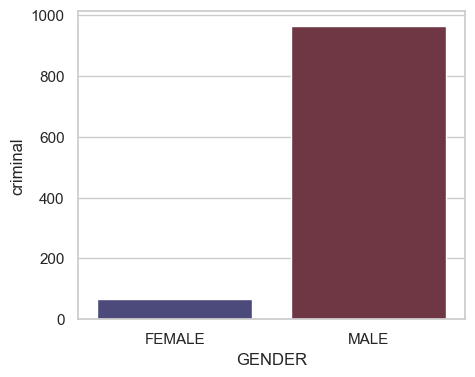

In [44]:
plt.figure(figsize=(5,4))
# Passing X axis and Y axis along with subplot position
sns.barplot(x = party_winner1.index , y = party_winner1['criminal']  ,hue=party_winner1.index, palette='icefire');


From the above graph it can be said that the male candidates with the history of criminal cases is more than female candidates.